<a href="https://colab.research.google.com/github/mnobelf/computational_data_science_uis2/blob/main/First_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Data Set ML Models

In [ ]:
import pandas as pd

# 1. Load the training and test sets
train_data = pd.read_csv("sample_data/california_housing_train.csv")
test_data = pd.read_csv("sample_data/california_housing_test.csv")
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 2. Separate features (X) and target (y)
X_train = train_data.drop("median_house_value", axis=1)
y_train = train_data["median_house_value"]

X_test = test_data.drop("median_house_value", axis=1)
y_test = test_data["median_house_value"]

# 3. Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print("Linear Regression RMSE:", rmse)
print("Linear Regression R^2:", r2)


Linear Regression RMSE: 69765.36022216761
Linear Regression R^2: 0.6195057678312047


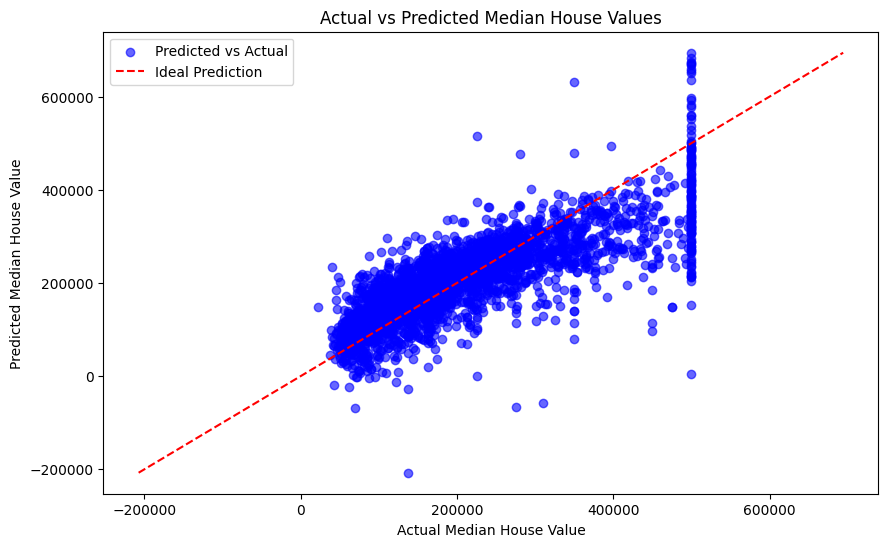

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test (actual values) and y_pred (predicted values) are already defined

plt.figure(figsize=(10, 6))
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

# Plot a diagonal line representing perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Median House Values')
plt.legend()
plt.show()

## Decision Tree Regression Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 3. Create and train the Decision Tree Regressor
# You can adjust max_depth to control overfitting
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_reg.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_tree = tree_reg.predict(X_test)

# 5. Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree RMSE:", rmse_tree)
print("Decision Tree R^2:", r2_tree)



Decision Tree RMSE: 64599.4265087906
Decision Tree R^2: 0.67376862933724


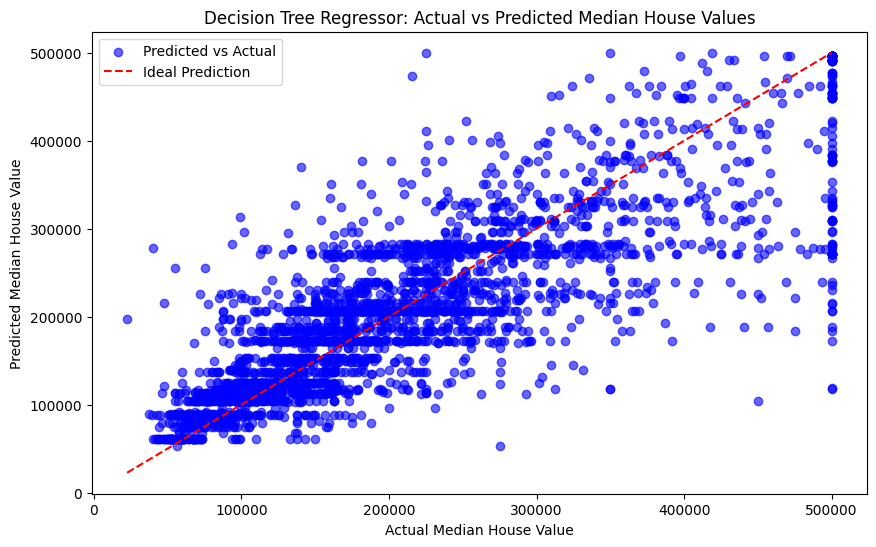

In [ ]:
# 6. Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='blue', label='Predicted vs Actual')

# Plot a diagonal line representing perfect predictions
min_val = min(y_test.min(), y_pred_tree.min())
max_val = max(y_test.max(), y_pred_tree.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Decision Tree Regressor: Actual vs Predicted Median House Values')
plt.legend()
plt.show()

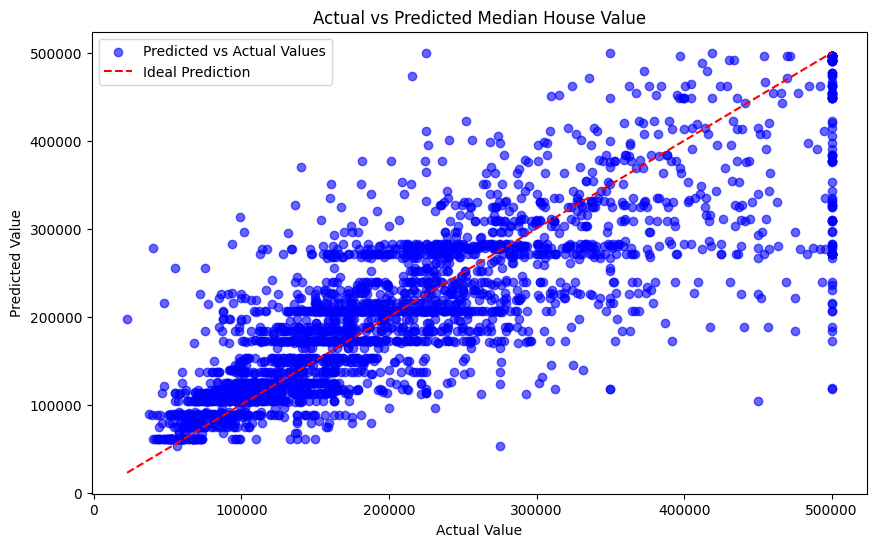

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the scatter plot
# x = [1, 2, 3, 4, 5]
# y = [10, 15, 13, 17, 19]

plt.figure(figsize=(10, 6))
# Scatter plot of actual vs. predicted values
x = y_test
y = y_pred_tree

# Create a scatter plot
plt.scatter(x, y, color='blue', alpha = 0.6, marker='o', label = 'Predicted vs Actual Values')  # 's' controls the size of the markers
# 6. Plot Actual vs Predicted Values
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred_tree, alpha=0.6, color='blue', label='Predicted vs Actual')

# Plot a diagonal line representing perfect predictions
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Prediction')
# Add title and labels to the axes

plt.title("Actual vs Predicted Median House Value")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.legend()

# Display the plot
plt.show()
